In [2]:
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt
from scipy.special import hermite
from scipy.integrate import quad

In [3]:
N = 100  # Size of the Hilbert space
omega = 1.0  # Oscillator frequency
m = 1.0  # Mass of the particle
hbar = 1.0  # Planck's constant in natural units

# Position and momentum scaling factors
x_0 = 1 / np.sqrt(2 * m * omega)  # x_0: characteristic length scale
p_0 = np.sqrt(m * omega / 2)  # p_0: characteristic momentum scale

# ### Define operators for the quantum harmonic oscillator

a = qt.destroy(N)  # Annihilation operator
id_op = qt.identity(N)  # Identity operator
n_op = a.dag() * a  # Number operator

x_op = (a + a.dag()) * x_0  # Position operator
p_op = -1j * (a - a.dag()) * p_0  # Momentum operator

def harmonic_potential(x, omega, m=1):
    """
    Harmonic oscillator potential function.
    V(x) = 0.5 * m * omega^2 * x^2
    """
    return 0.5 * m * omega**2 * x**2


x_values = np.linspace(-5 * x_0, 5 * x_0, 1000)  # Position grid

# Define wavefunctions based on the recurrence relation
def psi_0(x):
    return (1 / (2 * np.pi * x_0**2)**0.25) * np.exp(-x**2 / (4 * x_0**2))

def psi_1(x):
    return (x / x_0) * psi_0(x)

def psi_2(x):
    return (1 / np.sqrt(2)) * ((x / x_0)**2 - 1) * psi_0(x)

def psi_3(x):
    return (1 / np.sqrt(6)) * (x / x_0) * ((x / x_0)**2 - 3) * psi_0(x)

def prob_0(x):
    return np.abs(psi_0(x))**2

def prob_1(x):
    return np.abs(psi_1(x))**2

def prob_2(x):
    return np.abs(psi_2(x))**2


##define psi_n by recurrence
def psi_n(x, n, x_0=1.0):
    psin = []
    
    # Initialize psi_{-1} as 0 and psi_0 as the known function
    psi_minus1 = np.zeros_like(x)  # Psi_{-1}(x) = 0
    psi_0 = ( np.exp(-x**2 / (4 * x_0**2))/ (2 * np.pi * x_0**2)**0.25)  # Psi_0(x)
    
    psin.append(psi_minus1)
    psin.append(psi_0)
    # Calculate psi_n(x) for 1 <= n <= desired n using recurrence relation
    for i in range(1, n+1):
        psi_next = (x * psin[i] / x_0  - np.sqrt(i-1) * psin[i-1]) / np.sqrt(i)
        psin.append(psi_next)
    
    # Return only the desired psi_n
    return psin[-1]

##define prob density of psi_n
def prob_psi_n(x,n,x_0=1):
    return np.abs(psi_n(x,n,x_0))**2

def energy_levels(n,omega):
    return hbar*omega*(n+1/2)

def normalize_check(n,x_0):
    integral, error = quad(lambda x: prob_psi_n(x,n,x_0), -np.inf, np.inf)
    return integral

def overlap_integral(x, n1, n2, x_0=1.0):
    integral, error = quad(lambda x: psi_n(x, n1, x_0=1.0) * psi_n(x, n2, x_0=1.0), -np.inf, np.inf)
    return integral

def find_oscillator(x,n,interval,x_0=1):
    integral, error = quad(lambda x: prob_psi_n(x,n,x_0=1), -interval, interval)
    return integral

def calc_xcr(x_0,n):
    return x_0*np.sqrt(4*(n+1/2))

# Question 28

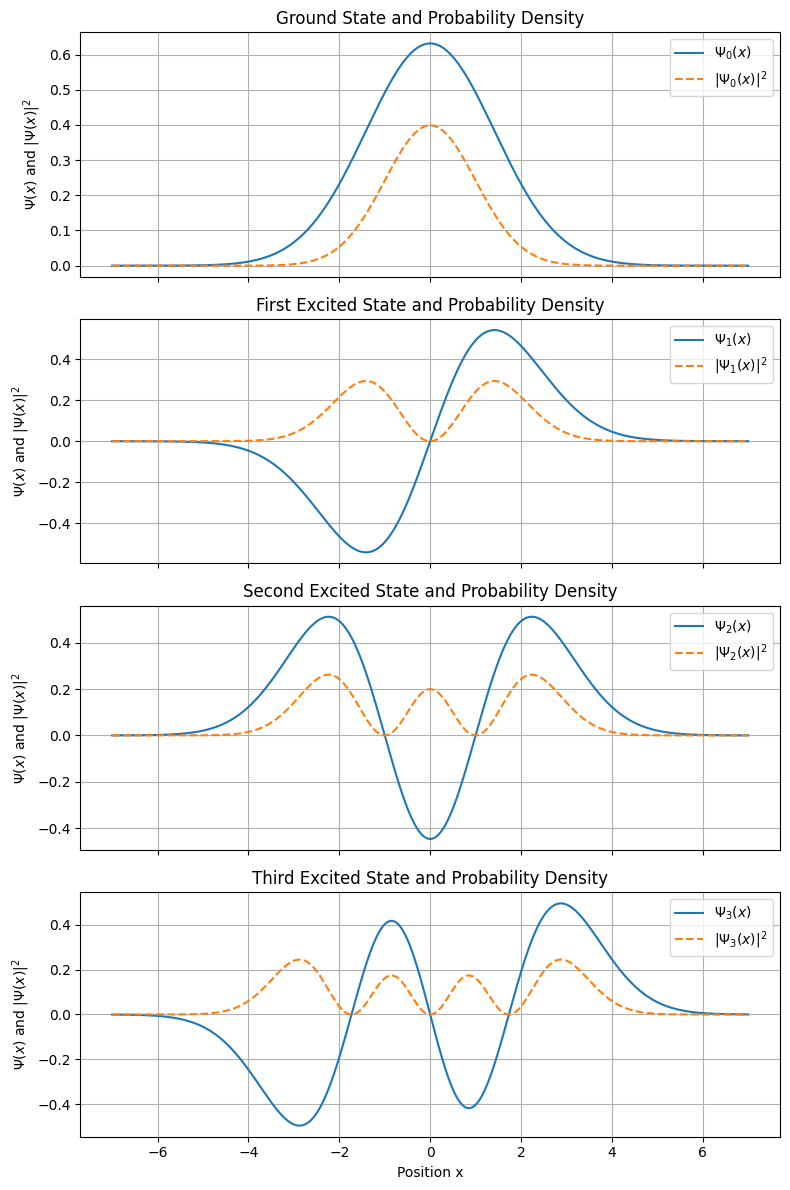

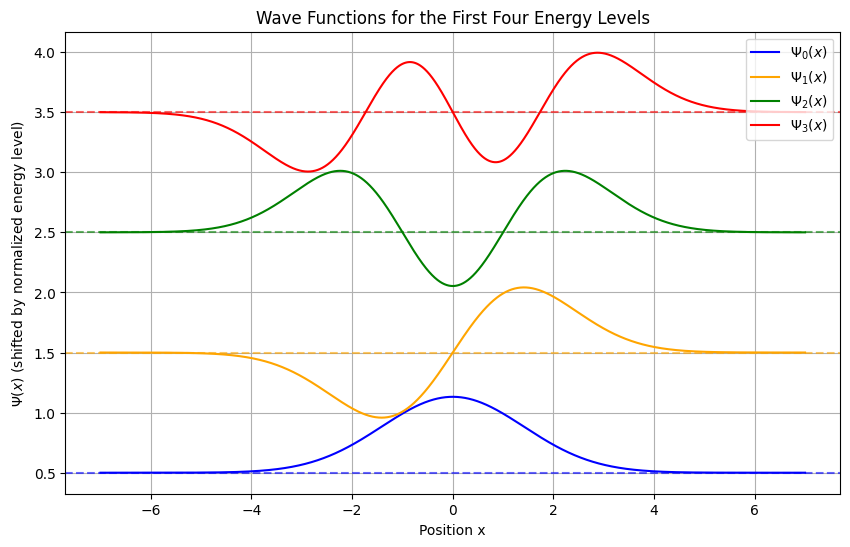

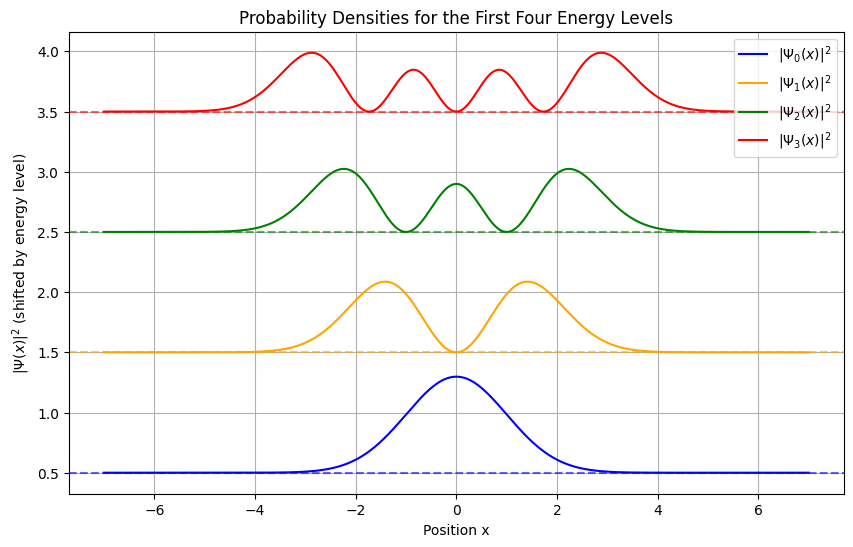

omega= 0.5


In [4]:
#Question 28 suite 
import numpy as np
import matplotlib.pyplot as plt
x_0 = 1
x_values = np.linspace(-7 * x_0, 7 * x_0, 10000)  # Position grid
omega = hbar/(2*m*x_0**2)

# Calculate wave functions and their squares
psi_0_vals = psi_n(x_values,0, x_0=1.0)
psi_1_vals = psi_n(x_values,1, x_0=1.0)
psi_2_vals = psi_n(x_values,2, x_0=1.0)
psi_3_vals = psi_n(x_values,3, x_0=1.0)

prob_0 = np.abs(psi_0_vals)**2
prob_1 = np.abs(psi_1_vals)**2
prob_2 = np.abs(psi_2_vals)**2
prob_3 = np.abs(psi_3_vals)**2

# Plot wavefunctions and probability densities
fig, ax = plt.subplots(4, 1, figsize=(8, 12), sharex=True)

ax[0].plot(x_values, psi_0_vals, label=r"$\Psi_0(x)$")
ax[0].plot(x_values, prob_0, '--', label=r"$|\Psi_0(x)|^2$")
ax[0].legend()
ax[0].set_title("Ground State and Probability Density")

ax[1].plot(x_values, psi_1_vals, label=r"$\Psi_1(x)$")
ax[1].plot(x_values, prob_1, '--', label=r"$|\Psi_1(x)|^2$")
ax[1].legend()
ax[1].set_title("First Excited State and Probability Density")

ax[2].plot(x_values, psi_2_vals, label=r"$\Psi_2(x)$")
ax[2].plot(x_values, prob_2, '--', label=r"$|\Psi_2(x)|^2$")
ax[2].legend()
ax[2].set_title("Second Excited State and Probability Density")

ax[3].plot(x_values, psi_3_vals, label=r"$\Psi_3(x)$")
ax[3].plot(x_values, prob_3, '--', label=r"$|\Psi_3(x)|^2$")
ax[3].legend()
ax[3].set_title("Third Excited State and Probability Density")

for axis in ax:
    axis.grid()
    axis.set_ylabel(r"$\Psi(x)$ and $|\Psi(x)|^2$")
ax[-1].set_xlabel("Position x")

plt.tight_layout()
plt.show()



# Calculate energy levels
energy_0 = energy_levels(0,omega)
energy_1 = energy_levels(1,omega)
energy_2 = energy_levels(2,omega)
energy_3 = energy_levels(3,omega)

# Plot for wave functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, psi_0_vals + (energy_0)/(hbar*omega), label=r"$\Psi_0(x)$", color="blue")
plt.plot(x_values, psi_1_vals + (energy_1)/(hbar*omega), label=r"$\Psi_1(x)$", color="orange")
plt.plot(x_values, psi_2_vals + (energy_2)/(hbar*omega), label=r"$\Psi_2(x)$", color="green")
plt.plot(x_values, psi_3_vals + (energy_3)/(hbar*omega), label=r"$\Psi_3(x)$", color="red")

# Mark energy levels
plt.axhline(y=energy_0/(hbar*omega), color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=energy_1/(hbar*omega), color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=energy_2/(hbar*omega), color="green", linestyle="--", alpha=0.6)
plt.axhline(y=energy_3/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Wave Functions for the First Four Energy Levels")
plt.xlabel("Position x")
plt.ylabel(r"$\Psi(x)$ (shifted by normalized energy level)")
plt.legend()
plt.grid()
plt.show()

# Plot for probability densities
plt.figure(figsize=(10, 6))
plt.plot(x_values, (prob_0 + energy_0)/(hbar*omega), label=r"$|\Psi_0(x)|^2$", color="blue")
plt.plot(x_values, (prob_1 + energy_1)/(hbar*omega), label=r"$|\Psi_1(x)|^2$", color="orange")
plt.plot(x_values, (prob_2 + energy_2)/(hbar*omega), label=r"$|\Psi_2(x)|^2$", color="green")
plt.plot(x_values, (prob_3 + energy_3)/(hbar*omega), label=r"$|\Psi_3(x)|^2$", color="red")

# Mark energy levels
plt.axhline(y=energy_0/(hbar*omega), color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=energy_1/(hbar*omega), color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=energy_2/(hbar*omega), color="green", linestyle="--", alpha=0.6)
plt.axhline(y=energy_3/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Probability Densities for the First Four Energy Levels")
plt.xlabel("Position x")
plt.ylabel(r"$|\Psi(x)|^2$ (shifted by energy level)")
plt.legend()
plt.grid()
plt.show()
print("omega=",omega)

# Question 29

Normalisation of Psi_0: 0.9999999999999997
Normalisation of Psi_1: 1.000000000000001
Normalisation of Psi_2: 1.0000000000000024


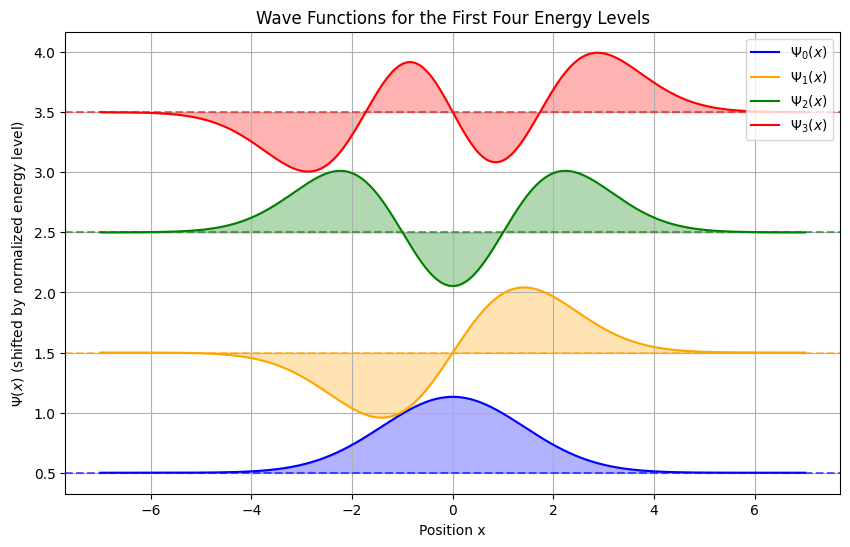

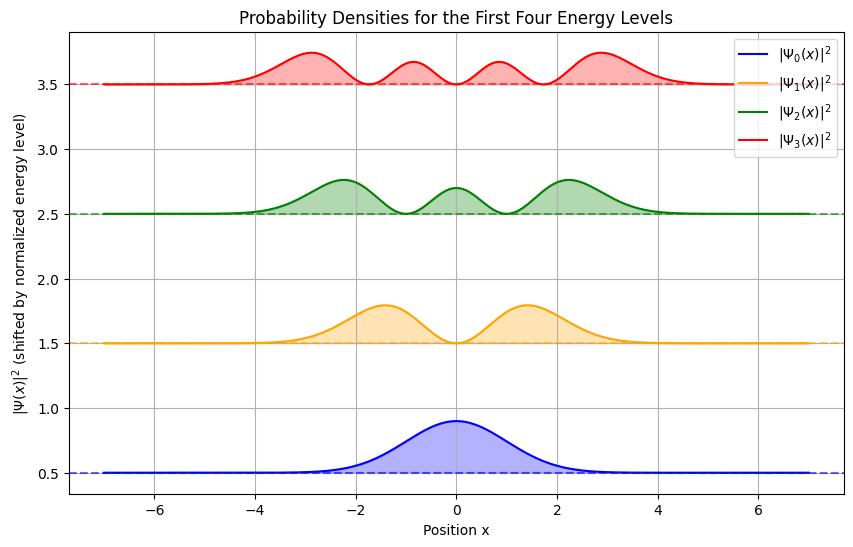

omega= 0.5


In [5]:
# Verification of the normalization
print("Normalisation of Psi_0:", normalize_check(0,x_0))
print("Normalisation of Psi_1:", normalize_check(1,x_0))
print("Normalisation of Psi_2:", normalize_check(2,x_0))


# Plot for wave functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, psi_0_vals + (energy_0)/(hbar*omega), label=r"$\Psi_0(x)$", color="blue")
plt.fill_between(x_values, energy_0/(hbar*omega), psi_0_vals + energy_0/(hbar*omega), color="blue", alpha=0.3)  # Highlight area

plt.plot(x_values, psi_1_vals + energy_1/(hbar*omega), label=r"$\Psi_1(x)$", color="orange")
plt.fill_between(x_values, energy_1/(hbar*omega), psi_1_vals + energy_1/(hbar*omega), color="orange", alpha=0.3)  # Highlight area

plt.plot(x_values, psi_2_vals + energy_2/(hbar*omega), label=r"$\Psi_2(x)$", color="green")
plt.fill_between(x_values, energy_2/(hbar*omega), psi_2_vals + energy_2/(hbar*omega), color="green", alpha=0.3)  # Highlight area

plt.plot(x_values, psi_3_vals + energy_3/(hbar*omega), label=r"$\Psi_3(x)$", color="red")
plt.fill_between(x_values, energy_3/(hbar*omega), psi_3_vals + energy_3/(hbar*omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
plt.axhline(y=energy_0/(hbar*omega), color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=energy_1/(hbar*omega), color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=energy_2/(hbar*omega), color="green", linestyle="--", alpha=0.6)
plt.axhline(y=energy_3/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Wave Functions for the First Four Energy Levels")
plt.xlabel("Position x")
plt.ylabel(r"$\Psi(x)$ (shifted by normalized energy level)")
plt.legend()
plt.grid()
plt.show()

# Plot for probability densities
plt.figure(figsize=(10, 6))
plt.plot(x_values, prob_0 + energy_0/(hbar*omega), label=r"$|\Psi_0(x)|^2$", color="blue")
plt.fill_between(x_values, energy_0/(hbar*omega), prob_0 + energy_0/(hbar*omega), color="blue", alpha=0.3)  # Highlight area

plt.plot(x_values, prob_1 + energy_1/(hbar*omega), label=r"$|\Psi_1(x)|^2$", color="orange")
plt.fill_between(x_values, energy_1/(hbar*omega), prob_1 + energy_1/(hbar*omega), color="orange", alpha=0.3)  # Highlight area

plt.plot(x_values, prob_2 + energy_2/(hbar*omega), label=r"$|\Psi_2(x)|^2$", color="green")
plt.fill_between(x_values, energy_2/(hbar*omega), prob_2 + energy_2/(hbar*omega), color="green", alpha=0.3)  # Highlight area

plt.plot(x_values, prob_3 + energy_3/(hbar*omega), label=r"$|\Psi_3(x)|^2$", color="red")
plt.fill_between(x_values, energy_3/(hbar*omega), prob_3 + energy_3/(hbar*omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
plt.axhline(y=energy_0/(hbar*omega), color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=energy_1/(hbar*omega), color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=energy_2/(hbar*omega), color="green", linestyle="--", alpha=0.6)
plt.axhline(y=energy_3/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Probability Densities for the First Four Energy Levels")
plt.xlabel("Position x")
plt.ylabel(r"$|\Psi(x)|^2$ (shifted by normalized energy level)")
plt.legend()
plt.grid()
plt.show()

print("omega=",omega)

# Question 30

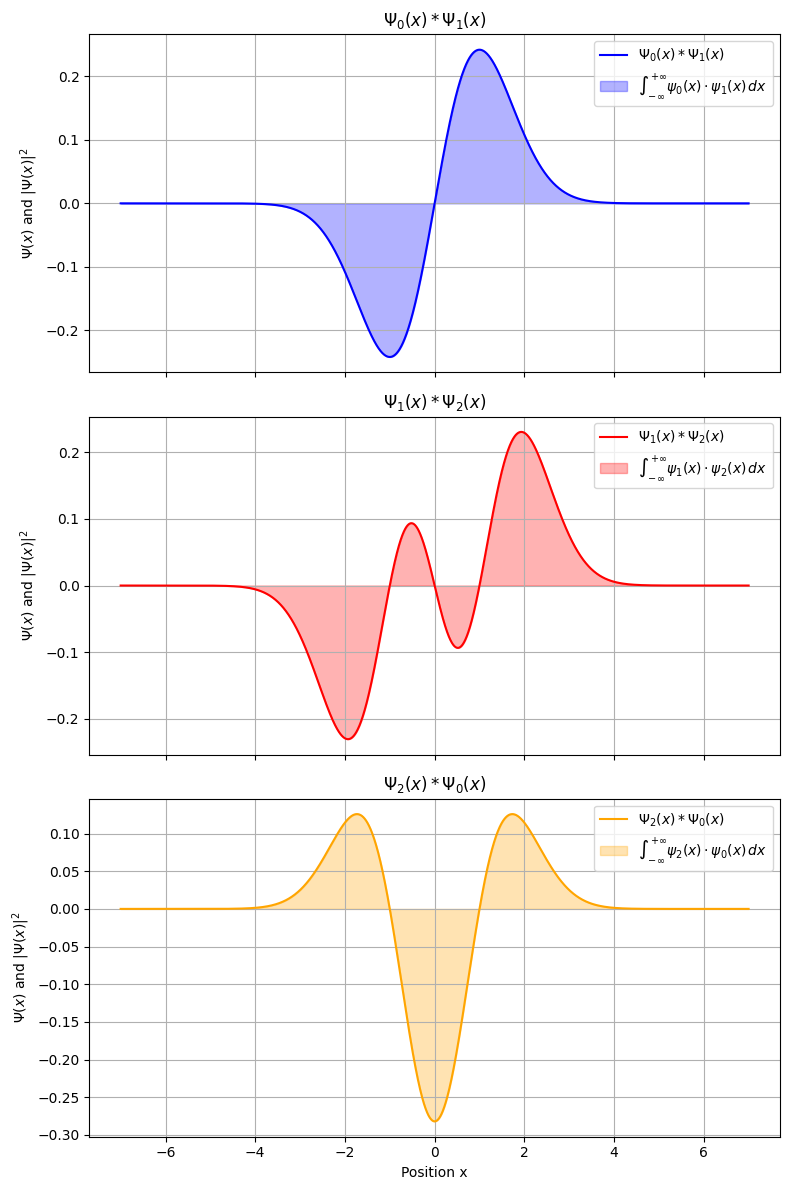

Overlap integral of Psi_0 * Psi_1: 0.0
Overlap integral of Psi_1 * Psi_2: 0.0
Overlap integral of Psi_2 * Psi_0: 6.38378239159465e-16
0.5


In [6]:
#Question 30
# Plot wavefunctions and probability densities
fig, ax = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

ax[0].plot(x_values, psi_0_vals*psi_1_vals,color="blue", label=r"$\Psi_0(x)*\Psi_1(x)$")
ax[0].fill_between(x_values, 0, psi_0_vals*psi_1_vals, color="blue",label=r"$\int_{-\infty}^{+\infty} \psi_0(x) \cdot \psi_1(x) \, dx$", alpha=0.3)
ax[0].legend()
ax[0].set_title(r"$\Psi_0(x)*\Psi_1(x)$")

ax[1].plot(x_values, psi_1_vals*psi_2_vals, color="red", label=r"$\Psi_1(x)*\Psi_2(x)$")
ax[1].fill_between(x_values, 0, psi_1_vals*psi_2_vals, color="red",label=r"$\int_{-\infty}^{+\infty} \psi_1(x) \cdot \psi_2(x) \, dx$", alpha=0.3)
ax[1].legend()
ax[1].set_title(r"$\Psi_1(x)*\Psi_2(x)$")

ax[2].plot(x_values, psi_2_vals*psi_0_vals, color="orange", label=r"$\Psi_2(x)*\Psi_0(x)$")
ax[2].fill_between(x_values, 0, psi_2_vals*psi_0_vals, color="orange", label=r"$\int_{-\infty}^{+\infty} \psi_2(x) \cdot \psi_0(x) \, dx$",  alpha=0.3)
ax[2].legend()
ax[2].set_title(r"$\Psi_2(x)*\Psi_0(x)$")

for axis in ax:
    axis.grid()
    axis.set_ylabel(r"$\Psi(x)$ and $|\Psi(x)|^2$")
ax[-1].set_xlabel("Position x")

plt.tight_layout()
plt.show()


# Calculate and print overlap integrals
print("Overlap integral of Psi_0 * Psi_1:", overlap_integral(x_values, 0, 1, 1.0))
print("Overlap integral of Psi_1 * Psi_2:", overlap_integral(x_values, 1, 2, 1.0))
print("Overlap integral of Psi_2 * Psi_0:", overlap_integral(x_values, 2, 0, 1.0))

print(omega)

# Question 31

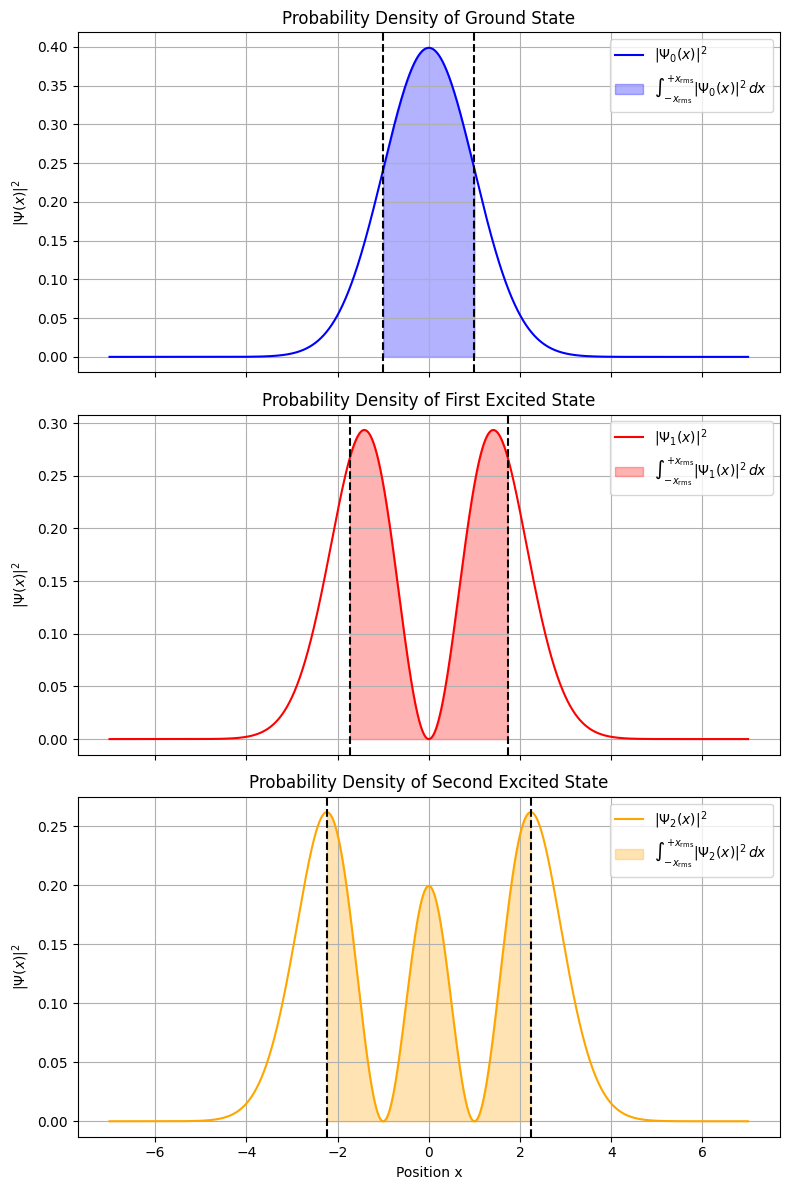

Probability of finding the oscillator between ±xrms when in Ground State: 0.6826894921370859
Probability of finding the oscillator between ±xrms when in First Excited State: 0.608374823728911
Probability of finding the oscillator between ±xrms when in Second Excited State: 0.535303204464737
omega= 0.5


In [7]:
#Question 31
# RMS values for each state
xrms0 = x_0 * np.sqrt(2 * 0 + 1)
xrms1 = x_0 * np.sqrt(2 * 1 + 1)
xrms2 = x_0 * np.sqrt(2 * 2 + 1)

# Create a mask for the region between -xrms0 and +xrms0
mask_0 = (x_values >= -xrms0) & (x_values <= xrms0)
mask_1 = (x_values >= -xrms1) & (x_values <= xrms1)
mask_2 = (x_values >= -xrms2) & (x_values <= xrms2)

# Plot wavefunctions and probability densities
fig, ax = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

ax[0].plot(x_values, prob_0, color="blue", label=r"$|\Psi_0(x)|^2$")
ax[0].fill_between(x_values, 0, prob_0, where=mask_0, color="blue", label=r"$\int_{-x_{\mathrm{rms}}}^{+x_{\mathrm{rms}}} |\Psi_0(x)|^2 \, dx$", alpha=0.3)
ax[0].axvline(x=-xrms0, color="black", linestyle="--")
ax[0].axvline(x=xrms0, color="black", linestyle="--")
ax[0].legend()
ax[0].set_title("Probability Density of Ground State")

ax[1].plot(x_values, prob_1, color="red", label=r"$|\Psi_1(x)|^2$")
ax[1].fill_between(x_values, 0, prob_1, where=mask_1, color="red", label=r"$\int_{-x_{\mathrm{rms}}}^{+x_{\mathrm{rms}}} |\Psi_1(x)|^2 \, dx$", alpha=0.3)
ax[1].axvline(x=-xrms1, color="black", linestyle="--")
ax[1].axvline(x=xrms1, color="black", linestyle="--")
ax[1].legend()
ax[1].set_title("Probability Density of First Excited State")

ax[2].plot(x_values, prob_2, color="orange", label=r"$|\Psi_2(x)|^2$")
ax[2].fill_between(x_values, 0, prob_2, where=mask_2, color="orange", label=r"$\int_{-x_{\mathrm{rms}}}^{+x_{\mathrm{rms}}} |\Psi_2(x)|^2 \, dx$", alpha=0.3)
ax[2].axvline(x=-xrms2, color="black", linestyle="--")
ax[2].axvline(x=xrms2, color="black", linestyle="--")
ax[2].legend()
ax[2].set_title("Probability Density of Second Excited State")

for axis in ax:
    axis.grid()
    axis.set_ylabel(r"$|\Psi(x)|^2$")
ax[-1].set_xlabel("Position x")

plt.tight_layout()
plt.show()

# Verification of the normalization within the RMS range
print("Probability of finding the oscillator between ±xrms when in Ground State:", find_oscillator(x_values, 0, xrms0, x_0=1))
print("Probability of finding the oscillator between ±xrms when in First Excited State:", find_oscillator(x_values, 1, xrms1, x_0=1))
print("Probability of finding the oscillator between ±xrms when in Second Excited State:", find_oscillator(x_values, 2, xrms2, x_0=1))
print("omega=",omega)


# Question 32

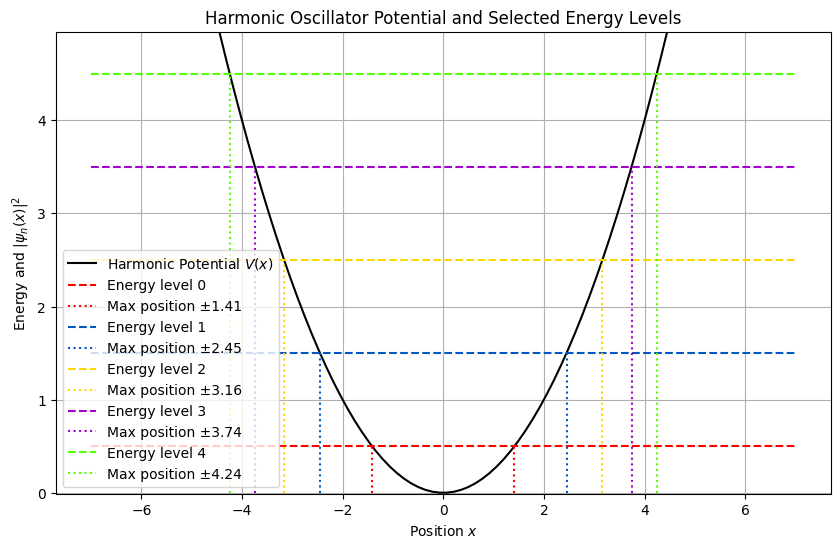

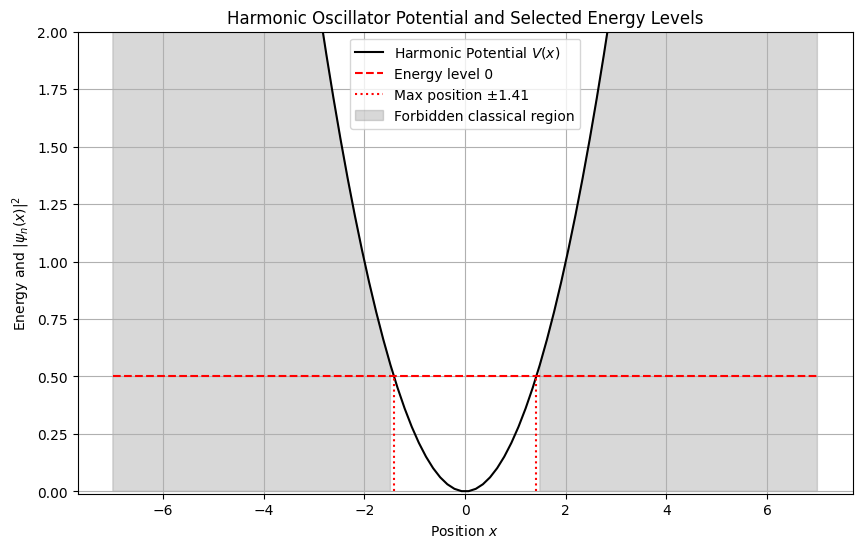

omega= 0.5


In [8]:
#Question 32

def plot_harmonic_oscillator_energies(omega, x_0=1, n_states=[5], x_values=np.linspace(-7, 7, 100)):
    """
    Plots the harmonic oscillator potential and the first n_states wavefunctions.
    
    Parameters:
    - n_states: list, list of states to plot energy levels for
    - omega: float, oscillator frequency
    - x_values: array, range for x values in the plot
    """
    # Define a color map for the energy levels
    colors = plt.cm.prism(np.linspace(0, 1, len(n_states)))
    
    # Calculate the potential
    potential = harmonic_potential(x_values, omega)
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the potential
    plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")

    # Calculate xrms for each state
    xc = [x_0*np.sqrt(4*(n+1/2)) for n in n_states]

    # Plot each energy level with a different color
    for i, n in enumerate(n_states):
        energy_level = (n + 0.5) * omega
        plt.hlines(energy_level/(hbar*omega), xmin=min(x_values), xmax=max(x_values), linestyles='dashed', colors=colors[i], label=f"Energy level {n}")
        
        # Plot vertical lines for the maximum position
        plt.vlines(xc[i], ymin=0, ymax=energy_level/(hbar*omega), linestyles='dotted', colors=colors[i], label=f"Max position ±{xc[i]:.2f}")
        plt.vlines(-xc[i], ymin=0, ymax=energy_level/(hbar*omega), linestyles='dotted', colors=colors[i])
    
    # Customize plot
    plt.xlabel("Position $x$")
    plt.ylabel("Energy and $|\psi_n(x)|^2$")
    plt.title(f"Harmonic Oscillator Potential and Selected Energy Levels")
    plt.ylim([-.01, 1.1 * max((n + 0.5) for n in n_states)])
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    # Plot the potential
    plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
    plt.hlines(energy_0/(hbar*omega), xmin=min(x_values), xmax=max(x_values), linestyles='dashed', colors="red", label=f"Energy level {0}")
    plt.vlines(xc[0], ymin=0, ymax=energy_0/(hbar*omega), linestyles='dotted', colors="red", label=f"Max position ±{xc[0]:.2f}")
    plt.vlines(-xc[0], ymin=0, ymax=energy_0/(hbar*omega), linestyles='dotted', colors="red")
    

    # Create a mask for the region outside the classical bounds (-xc0 and +xc0)
    mask_xc0 = (x_values <= -xc[0]) | (x_values >= xc[0])  # Use | for logical OR
    plt.fill_between(x_values, 0, potential / (hbar * omega), where=mask_xc0, color="grey", label="Forbidden classical region", alpha=0.3)

    
    # Customize plot
    plt.xlabel("Position $x$")
    plt.ylabel("Energy and $|\psi_n(x)|^2$")
    plt.title(f"Harmonic Oscillator Potential and Selected Energy Levels")
    plt.ylim([-.01, 2])
    plt.legend()
    plt.grid()
    plt.show()

    
# Example: Plot the harmonic oscillator potential with different energy levels colored
plot_harmonic_oscillator_energies(omega,n_states=[0, 1, 2, 3, 4],)
print("omega=",omega)


# Question 33

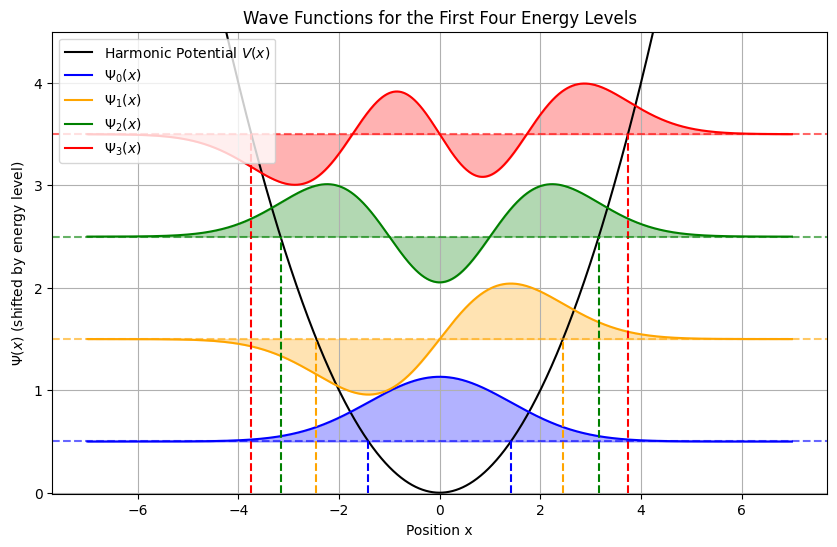

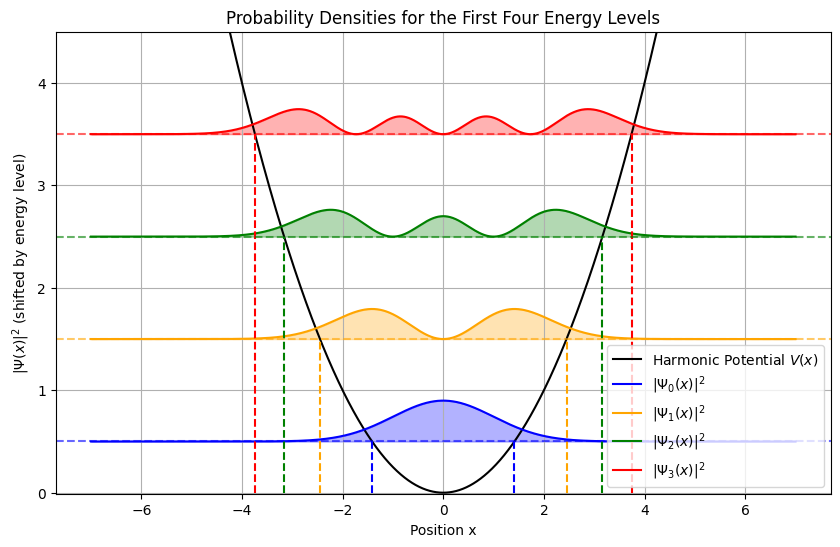

In [9]:
#Question 33
import numpy as np
import matplotlib.pyplot as plt


xcr0 = calc_xcr(x_0,0)
xcr1 = calc_xcr(x_0,1)
xcr2 = calc_xcr(x_0,2)
xcr3 = calc_xcr(x_0,3)

# Calculate the potential
potential = harmonic_potential(x_values, omega)

# Plot for wave functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")


plt.plot(x_values, psi_0_vals + energy_0/(hbar*omega), label=r"$\Psi_0(x)$", color="blue")
plt.vlines(xcr0, ymin=0, ymax=energy_0/(hbar*omega), linestyles='dashed', colors="blue")
plt.vlines(-xcr0, ymin=0, ymax=energy_0/(hbar*omega), linestyles='dashed', colors="blue")
plt.fill_between(x_values, energy_0/(hbar*omega), psi_0_vals + energy_0/(hbar*omega), color="blue", alpha=0.3)  # Highlight area

plt.plot(x_values, psi_1_vals + energy_1/(hbar*omega), label=r"$\Psi_1(x)$", color="orange")
plt.vlines(xcr1, ymin=0, ymax=energy_1/(hbar*omega), linestyles='dashed', colors="orange")
plt.vlines(-xcr1, ymin=0, ymax=energy_1/(hbar*omega), linestyles='dashed', colors="orange")
plt.fill_between(x_values, energy_1/(hbar*omega), psi_1_vals + energy_1/(hbar*omega), color="orange", alpha=0.3)  # Highlight area

plt.plot(x_values, psi_2_vals + energy_2/(hbar*omega), label=r"$\Psi_2(x)$", color="green")
plt.vlines(xcr2, ymin=0, ymax=energy_2/(hbar*omega), linestyles='dashed', colors="green")
plt.vlines(-xcr2, ymin=0, ymax=energy_2/(hbar*omega), linestyles='dashed', colors="green")
plt.fill_between(x_values, energy_2/(hbar*omega), psi_2_vals + energy_2/(hbar*omega), color="green", alpha=0.3)  # Highlight area

plt.plot(x_values, psi_3_vals + energy_3/(hbar*omega), label=r"$\Psi_3(x)$", color="red")
plt.vlines(xcr3, ymin=0, ymax=energy_3/(hbar*omega), linestyles='dashed', colors="red")
plt.vlines(-xcr3, ymin=0, ymax=energy_3/(hbar*omega), linestyles='dashed', colors="red")
plt.fill_between(x_values, energy_3/(hbar*omega), psi_3_vals + energy_3/(hbar*omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
plt.axhline(y=energy_0/(hbar*omega), color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=energy_1/(hbar*omega), color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=energy_2/(hbar*omega), color="green", linestyle="--", alpha=0.6)
plt.axhline(y=energy_3/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Wave Functions for the First Four Energy Levels")
plt.xlabel("Position x")
plt.ylabel(r"$\Psi(x)$ (shifted by energy level)")
plt.legend()
plt.ylim([-.01, 4.5])  # Set the y-axis limit to reduce potential curve height
plt.grid()
plt.show()

# Plot for probability densities
plt.figure(figsize=(10, 6))
plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
plt.plot(x_values, prob_0 + energy_0/(hbar*omega), label=r"$|\Psi_0(x)|^2$", color="blue")
plt.vlines(xcr0, ymin=0, ymax=energy_0/(hbar*omega), linestyles='dashed', colors="blue")
plt.vlines(-xcr0, ymin=0, ymax=energy_0/(hbar*omega), linestyles='dashed', colors="blue")
plt.fill_between(x_values, energy_0/(hbar*omega), prob_0 + energy_0/(hbar*omega), color="blue", alpha=0.3)  # Highlight area

plt.plot(x_values, prob_1 + energy_1/(hbar*omega), label=r"$|\Psi_1(x)|^2$", color="orange")
plt.vlines(xcr1, ymin=0, ymax=energy_1/(hbar*omega), linestyles='dashed', colors="orange")
plt.vlines(-xcr1, ymin=0, ymax=energy_1/(hbar*omega), linestyles='dashed', colors="orange")
plt.fill_between(x_values, energy_1/(hbar*omega), prob_1 + energy_1/(hbar*omega), color="orange", alpha=0.3)  # Highlight area

plt.plot(x_values, prob_2 + energy_2/(hbar*omega), label=r"$|\Psi_2(x)|^2$", color="green")
plt.vlines(xcr2, ymin=0, ymax=energy_2/(hbar*omega), linestyles='dashed', colors="green")
plt.vlines(-xcr2, ymin=0, ymax=energy_2/(hbar*omega), linestyles='dashed', colors="green")
plt.fill_between(x_values, energy_2/(hbar*omega), prob_2 + energy_2/(hbar*omega), color="green", alpha=0.3)  # Highlight area

plt.plot(x_values, prob_3 + energy_3/(hbar*omega), label=r"$|\Psi_3(x)|^2$", color="red")
plt.vlines(xcr3, ymin=0, ymax=energy_3/(hbar*omega), linestyles='dashed', colors="red")
plt.vlines(-xcr3, ymin=0, ymax=energy_3/(hbar*omega), linestyles='dashed', colors="red")
plt.fill_between(x_values, energy_3/(hbar*omega), prob_3 + energy_3/(hbar*omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
plt.axhline(y=energy_0/(hbar*omega), color="blue", linestyle="--", alpha=0.6)
plt.axhline(y=energy_1/(hbar*omega), color="orange", linestyle="--", alpha=0.6)
plt.axhline(y=energy_2/(hbar*omega), color="green", linestyle="--", alpha=0.6)
plt.axhline(y=energy_3/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Probability Densities for the First Four Energy Levels")
plt.xlabel("Position x")
plt.ylabel(r"$|\Psi(x)|^2$ (shifted by energy level)")
plt.legend()
plt.ylim([-.01, 4.5])  # Set the y-axis limit to reduce potential curve height
plt.grid()
plt.show()


# Question 34

100.5
20.049937655763422


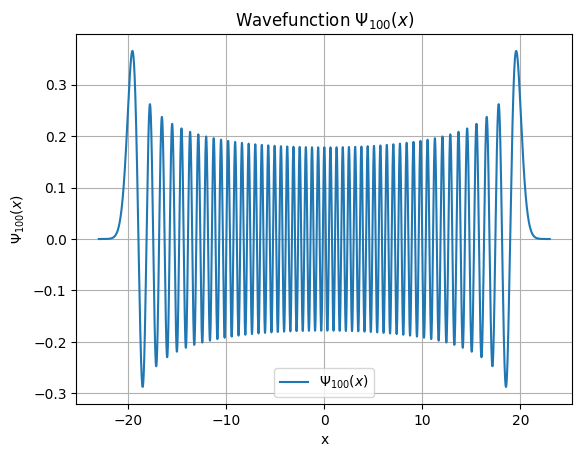

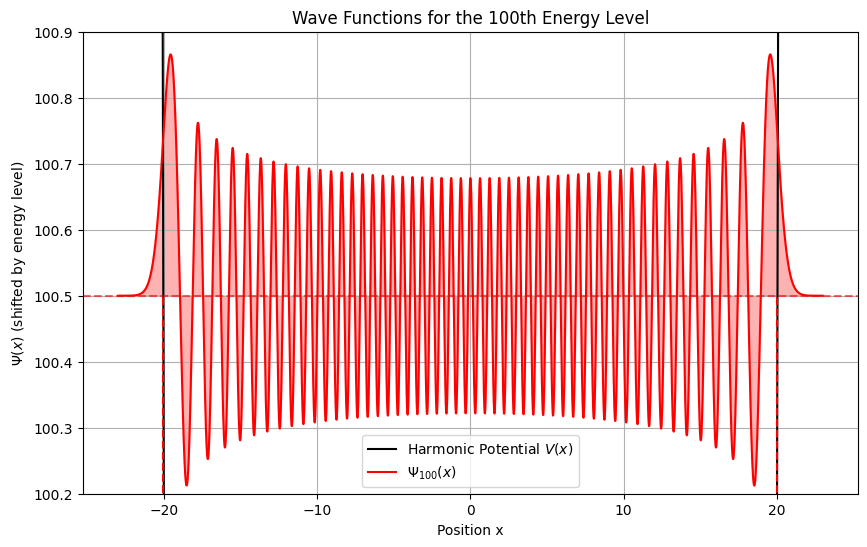

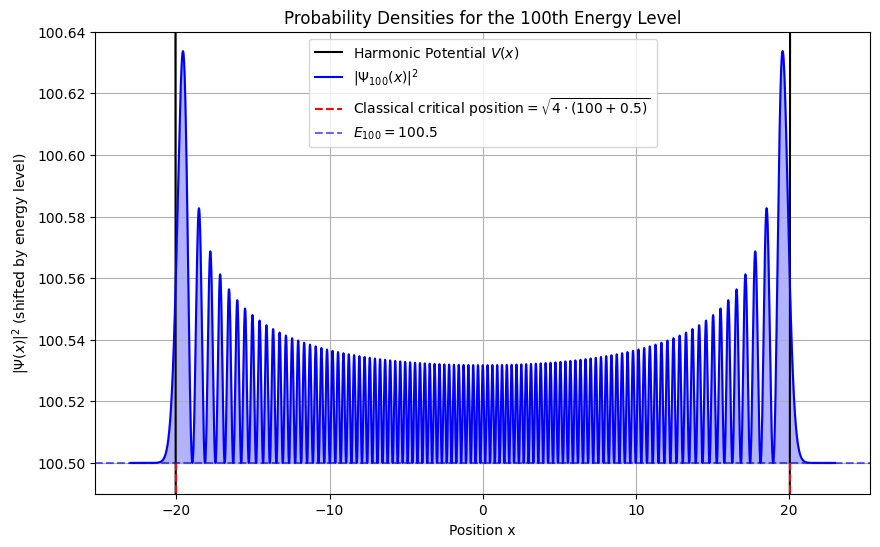

omega= 0.5


In [10]:
x_values = np.linspace(-23, 23, 10001)
psi_100_values = psi_n(x_values, 100)
prob_100=prob_psi_n(x_values,100,x_0=1)
#print(normalize_check(100,x_0))
energy_100=energy_levels(100,omega)
xcr100=calc_xcr(x_0,100)
print(energy_100/(hbar*omega))
print(xcr100)

plt.plot(x_values, psi_100_values, label="$\Psi_{100}(x)$")
plt.xlabel("x")
plt.ylabel("$\Psi_{100}(x)$")
plt.title("Wavefunction $\Psi_{100}(x)$")
plt.legend()
plt.grid()
plt.show()



# Calculate the potential
potential = harmonic_potential(x_values, omega)

# Plot for wave functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")

plt.plot(x_values, psi_100_values + energy_100/(hbar*omega), label=r"$\Psi_{100}(x)$", color="red")
plt.vlines(xcr100, ymin=0, ymax=energy_100/(hbar*omega), linestyles='dashed', colors="red")
plt.vlines(-xcr100, ymin=0, ymax=energy_100/(hbar*omega), linestyles='dashed', colors="red")
plt.fill_between(x_values, energy_100/(hbar*omega), psi_100_values + energy_100/(hbar*omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
plt.axhline(y=energy_100/(hbar*omega), color="red", linestyle="--", alpha=0.6)

plt.title("Wave Functions for the 100th Energy Level")
plt.xlabel("Position x")
plt.ylabel(r"$\Psi(x)$ (shifted by energy level)")
plt.legend()
plt.ylim([100.2, 100.9])  # Set the y-axis limit to reduce potential curve height
plt.grid()
plt.show()

# Plot for probability densities
plt.figure(figsize=(10, 6))
plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")

plt.plot(x_values, prob_100 + energy_100/(hbar*omega), label=r"$|\Psi_{100}(x)|^2$", color="blue")
plt.vlines(xcr100, ymin=0, ymax=energy_100/(hbar*omega), linestyles='dashed', colors="red", label=r"$\text{Classical critical position} = \sqrt{4 \cdot (100 + 0.5)}$")
plt.vlines(-xcr100, ymin=0, ymax=energy_100/(hbar*omega), linestyles='dashed', colors="red")
plt.fill_between(x_values, energy_100/(hbar*omega), prob_100 + energy_100/(hbar*omega), color="blue", alpha=0.3)  # Highlight area

# Mark energy levels
plt.axhline(y=energy_100/(hbar*omega), color="blue", linestyle="--", label=r"$E_{100} = 100.5$", alpha=0.6)

plt.title("Probability Densities for the 100th Energy Level")
plt.xlabel("Position x")
plt.ylabel(r"$|\Psi(x)|^2$ (shifted by energy level)")
plt.legend()
plt.ylim([100.49, 100.64])  # Set the y-axis limit to reduce potential curve height
plt.grid()
plt.show()
print("omega=",omega)

# Question 36

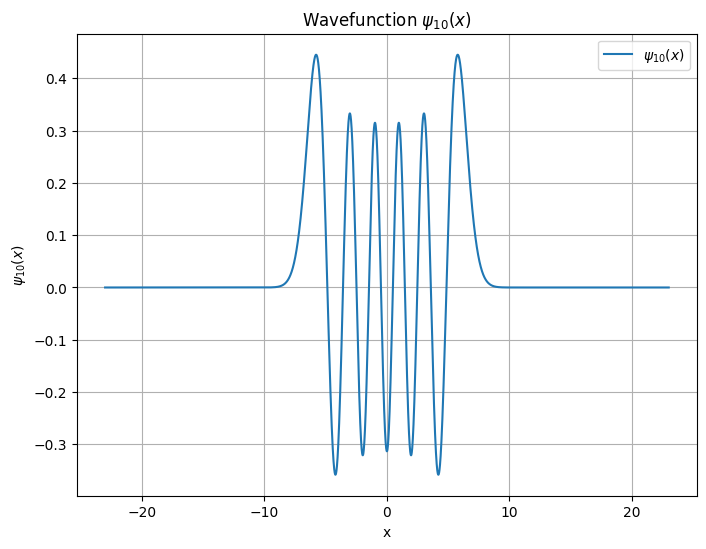

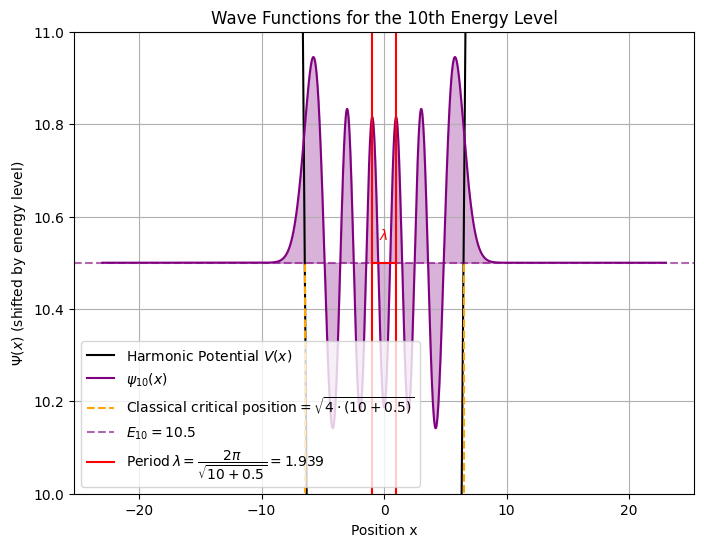

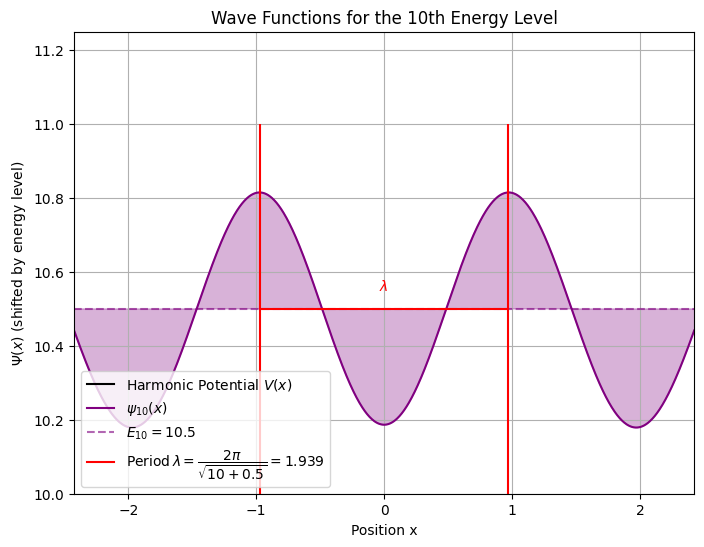

Dominant period (lambda): 1.950400000000002


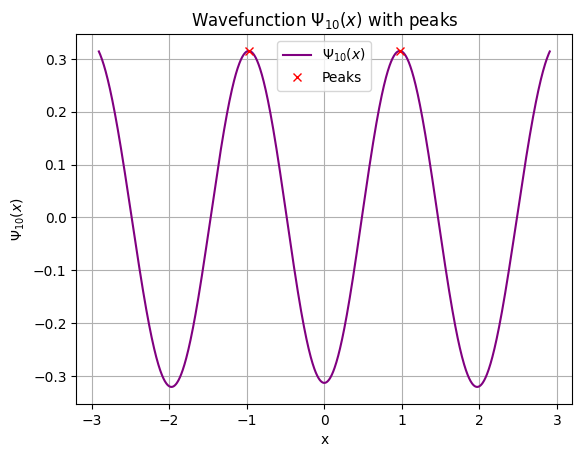

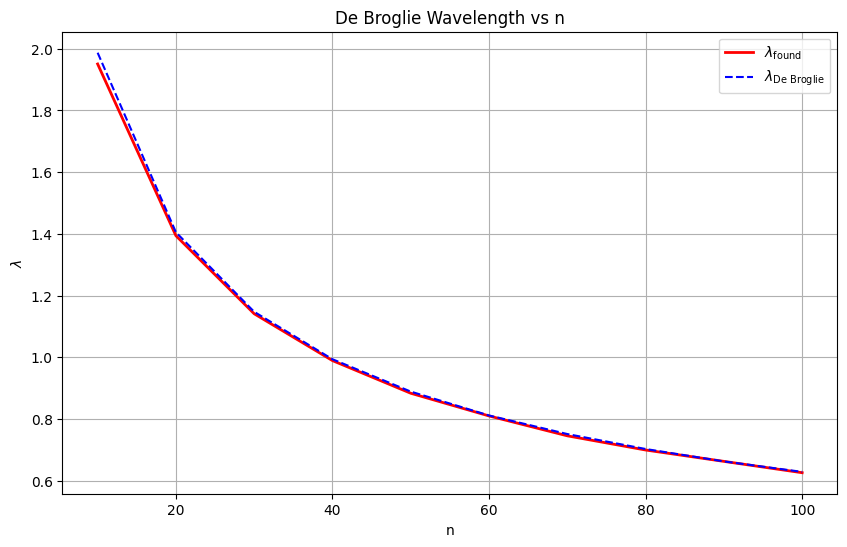

omega= 0.5


In [11]:
from scipy.signal import find_peaks
# Main function to generate plots and perform analysis
def all(n,x_0,omega,x_values):
    energy_n=energy_levels(n,omega)
    xcrn=calc_xcr(x_0,n)
    psi_n_values = psi_n(x_values, n)

    # Plot wavefunction
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, psi_n_values, label=f"$\\psi_{{{n}}}(x)$")
    plt.xlabel("x")
    plt.ylabel(f"$\\psi_{{{n}}}(x)$")
    plt.title(f"Wavefunction $\\psi_{{{n}}}(x)$")
    plt.legend()
    plt.grid()
    plt.show()


    # Period line with arrows
    y_position = energy_n
    x_start = -np.pi / np.sqrt(n + 0.5)
    x_end = np.pi / np.sqrt(n + 0.5)
    lamda_n = 2 * np.pi / np.sqrt(n + 0.5)
    
    # Calculate the potential
    potential = harmonic_potential(x_values, omega)
    
    # Plot wave function with potential
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
    plt.plot(x_values, psi_n_values + energy_n/(hbar*omega), label=f"$\\psi_{{{n}}}(x)$", color="purple")
    plt.vlines(xcrn, ymin=0, ymax=energy_n/(hbar*omega), linestyles='dashed', colors="orange", 
           label=fr"$\text{{Classical critical position}} = \sqrt{{4 \cdot ({n} + 0.5)}}$")
    plt.vlines(x_start, ymin=energy_n/(hbar*omega)-0.5, ymax=energy_n/(hbar*omega)+0.5, linestyles='-', colors="red")
    plt.vlines(x_end, ymin=energy_n/(hbar*omega)-0.5, ymax=energy_n/(hbar*omega)+0.5, linestyles='-', colors="red")
    plt.vlines(-xcrn, ymin=0, ymax=energy_n/(hbar*omega), linestyles='dashed', colors="orange")
    plt.fill_between(x_values, energy_n/(hbar*omega), psi_n_values + energy_n/(hbar*omega), color="purple", alpha=0.3)  # Highlight area

    # Mark energy level
    plt.axhline(y=energy_n/(hbar*omega), color="purple", linestyle="--", label=f"$E_{{{n}}} = {energy_n/(hbar*omega)}$", alpha=0.6)
    
    
    plt.plot([x_start, x_end], [y_position/(hbar*omega), y_position/(hbar*omega)], color="red", linestyle="-", alpha=1,
             label=fr"$\mathrm{{Period}} \, \lambda = \dfrac{{2\pi}}{{\sqrt{{{n} + 0.5}}}} = {lamda_n:.3f}$")
    plt.annotate(r"$\lambda$", xy=((x_start + x_end) / 2, y_position/(hbar*omega) + 0.05), ha="center", color="red")

    plt.title(f"Wave Functions for the {n}th Energy Level")
    plt.xlabel("Position x")
    plt.ylabel(r"$\Psi(x)$ (shifted by energy level)")
    plt.legend()
    plt.ylim([energy_n/(hbar*omega)-0.5, energy_n/(hbar*omega)+0.5])  # Limit y-axis
    plt.grid()
    plt.show()

    # Zoomed-in plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, potential/(hbar*omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
    plt.plot(x_values, psi_n_values + energy_n/(hbar*omega), label=f"$\\psi_{{{n}}}(x)$", color="purple")
    plt.fill_between(x_values, energy_n/(hbar*omega), psi_n_values + energy_n/(hbar*omega), color="purple", alpha=0.3)
    plt.axhline(y=energy_n/(hbar*omega), color="purple", linestyle="--", label=f"$E_{{{n}}} = {energy_n/(hbar*omega)}$", alpha=0.6)
    plt.plot([x_start, x_end], [y_position/(hbar*omega), y_position/(hbar*omega)], color="red", linestyle="-", alpha=1,
             label=fr"$\mathrm{{Period}} \, \lambda = \dfrac{{2\pi}}{{\sqrt{{{n} + 0.5}}}} = {lamda_n:.3f}$")
    plt.vlines(x_start, ymin=energy_n/(hbar*omega)-0.5, ymax=energy_n/(hbar*omega)+0.5, linestyles='-', colors="red")
    plt.vlines(x_end, ymin=energy_n/(hbar*omega)-0.5, ymax=energy_n/(hbar*omega)+0.5, linestyles='-', colors="red")
    plt.annotate(r"$\lambda$", xy=((x_start + x_end) / 2, y_position/(hbar*omega) + 0.05), ha="center", color="red")

    plt.title(f"Wave Functions for the {n}th Energy Level")
    plt.xlabel("Position x")
    plt.ylabel(r"$\Psi(x)$ (shifted by energy level)")
    plt.legend(loc="lower left")
    plt.xlim([2.5 * x_start, 2.5 * x_end])
    plt.ylim([energy_n/(hbar*omega)-0.5, energy_n/(hbar*omega)+0.75])  # Limit y-axis
    plt.grid()
    plt.show()

    # Trouver les pics dans psi_n_values
    mask = (x_values >= 3*x_start) & (x_values <= 3*x_end)  # Limiter la recherche aux valeurs autour de x = 0
    x_subset = x_values[mask]
    psi_n_subset = psi_n_values[mask]

    peaks, _ = find_peaks(psi_n_subset, distance=20)  # Ajustez 'distance' si nécessaire

    # Vérifier si au moins deux pics sont trouvés
    if len(peaks) >= 2:
        # Extraire les positions des deux premiers pics autour de x=0
        peak_positions = x_subset[peaks[:2]]
        lambda_period = np.abs(peak_positions[1] - peak_positions[0])
        print(f"Dominant period (lambda): {lambda_period}")

        # Graphique de la fonction d'onde avec les pics marqués
        plt.plot(x_subset, psi_n_subset,color="purple", label=f"$\Psi_{{{n}}}(x)$")
        plt.plot(peak_positions, psi_n_subset[peaks[:2]], "x", color="red", label="Peaks")
        plt.xlabel("x")
        plt.ylabel(f"$\Psi_{{{n}}}(x)$")
        plt.title(f"Wavefunction $\Psi_{{{n}}}(x)$ with peaks")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("Not enough peaks found in the specified range to determine lambda.")


# Example usage
all(10,x_0,omega,x_values = np.linspace(-23, 23, 10001))





def relation_lambda_n(x_0,x_values, n_lists=np.linspace(10, 100, 10)):

    lambda_debroglie = []

    for n in n_lists:
        n_int = int(n)  # Convertir n en entier pour psi_n
        psi_n_values = psi_n(x_values, n_int)
        x_start = -np.pi / np.sqrt(n + 0.5)
        x_end = np.pi / np.sqrt(n + 0.5)
        mask = (x_values >= 3*x_start) & (x_values <= 3*x_end)  # Limiter la recherche aux valeurs autour de x = 0
        x_subset = x_values[mask]
        psi_n_subset = psi_n_values[mask]
        
        # Trouver les pics
        peaks, _ = find_peaks(psi_n_subset, distance=20)
        if len(peaks) >= 2:
            # Récupérer les positions des deux premiers pics
            peak_positions = x_subset[peaks[:2]]
            lambda_period = np.abs(peak_positions[1] - peak_positions[0])
            lambda_debroglie.append(lambda_period)
        else:
            lambda_debroglie.append(np.nan)  # Valeur par défaut si moins de deux pics

    # Tracé de lambda trouvé et de lambda de Broglie
    plt.figure(figsize=(10, 6))
    plt.plot(n_lists, lambda_debroglie, color="red", label=r"$\lambda_{\text{found}}$",linewidth=2)
    plt.plot(n_lists, 2 * np.pi * x_0 / np.sqrt(n_lists), color="blue", linestyle="--", label=r"$\lambda_{\text{De Broglie}}$")
    plt.xlabel("n")
    plt.ylabel(r"$\lambda$")
    plt.title(r"De Broglie Wavelength vs n")
    plt.legend()
    plt.grid()
    plt.show()

# Appel de la fonction
relation_lambda_n(x_0, np.linspace(-23, 23, 10001))
print("omega=",omega)

# Question 38

0.5


/var/folders/0r/nnn8yqwd549bhsr3jqz9kqyh0000gn/T/ipykernel_29333/3502911959.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  coeffs = np.trapz(func, x_vals)


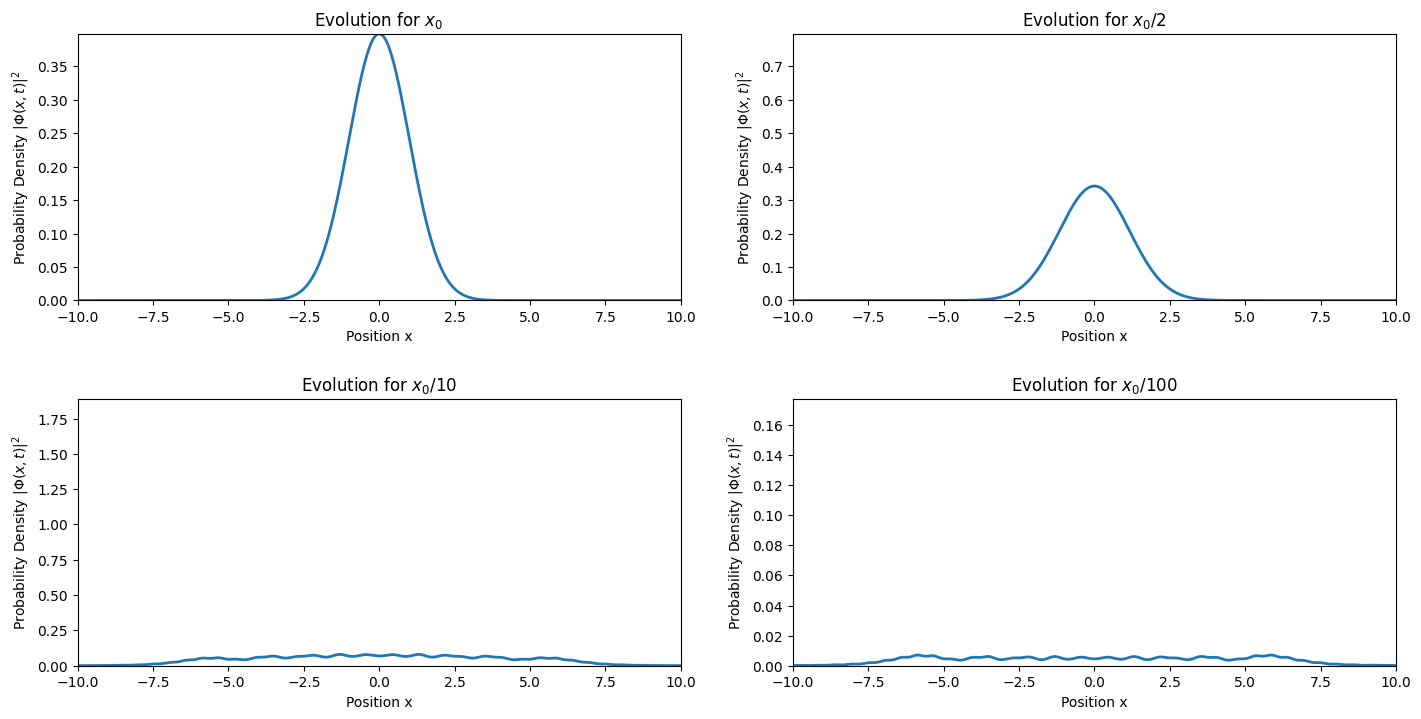

In [14]:
from matplotlib.animation import FuncAnimation, PillowWriter

Nmax = 50  # Maximum Fock state to consider
x_vals = np.linspace(-10 * x_0, 10 * x_0, 500)  # Position space range
time_steps = 400  # Number of time steps for the animation
total_time = 20.0  # Total time for the animation
dt = total_time / time_steps  # Time step duration
print(omega)

##define psi_n by recurrence and this time return all elements
def psi_n_whole(x, n, x_0=1.0):
    psin = []
    
    # Initialize psi_{0} and psi_{1}
    psi_0 = (np.exp(-x**2 / (4 * x_0**2))/ (2 * np.pi * x_0**2)**0.25)  # Psi_0(x)
    psi_1 = x * psi_0 / x_0  # Psi_1(x)
    psin.append(psi_0)
    psin.append(psi_1)
    # Calculate psi_n(x) for 1 <= n <= desired n using recurrence relation
    for i in range(1, n):
        psi_next = (x * psin[i] / x_0  - np.sqrt(i) * psin[i-1]) / np.sqrt(i+1)
        psin.append(psi_next)
    
    # Return complete psi_n
    return psin



# initial wavefunction
phi_x = lambda x, a: np.exp(-((x / (2 * a)) ** 2))/(2 * np.pi * a**2)**0.25


# precompute psi for all n
psi_n_values = np.array(psi_n_whole(x_vals, Nmax))


# Calculate coefficients φ_n for a given initial state Φ(x)
def phi_n(a):
    phi_x_a = phi_x(x_vals, a)
    func = phi_x_a * psi_n_values
    coeffs = np.trapz(func, x_vals)
    return coeffs


# precompute phi_n for different values of a
a_values = [x_0, x_0 / 2, x_0 / 10, x_0 / 100]
a_strs = ["$x_0$", "$x_0/2$", "$x_0/10$", "$x_0/100$"]

phi_n_coeffs_arr = np.array([phi_n(a) for a in a_values])

# time array
exponentials = np.exp(
    -1j * omega * np.outer(np.arange(Nmax + 1), np.linspace(0, total_time, time_steps))
)

# precompute Time-evolved wavefunction Φ(x, t) using Eq. (76) for each value of a
phi_x_t = np.array(
    [
        (
            psi_n_values[:, :, np.newaxis]
            * exponentials[:, np.newaxis, :]
            * phi_n_coeffs[:, np.newaxis, np.newaxis]
        ).sum(axis=0)
        for phi_n_coeffs in phi_n_coeffs_arr
    ]
)

# Create and save animations for each value of a
# Initialize the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.tight_layout(pad=5.0)
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlim(x_vals[0], x_vals[-1])
    ax.set_ylim(0, np.max(np.abs(phi_x_t[i]) ** 2))
    ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
    ax.set_xlabel("Position x")

line = [axes[i].plot([], [], lw=2)[0] for i in range(4)]
for idx in range(4):
    axes[idx].set_title(r"Evolution for {}".format(a_strs[idx]))


# Animation function
def animate(i):
    for idx, (a, label) in enumerate(zip(a_values, a_strs)):
        line[idx].set_data(x_vals, np.abs(phi_x_t[idx, :, i]) ** 2)
    return line

### seule chose qui change est :  interval=50 (enlever si jamais)
ani = FuncAnimation(fig, animate, frames=time_steps, interval=50, blit=True)

# Sauvegarder comme MP4
ani.save("wavepacket_evolution.mp4", writer="ffmpeg", fps=30)


plt.show()

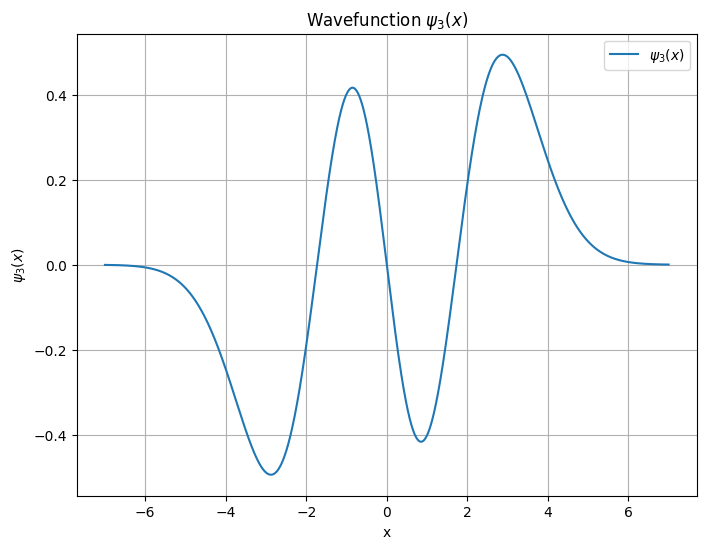

In [15]:
n=3
x_values=np.linspace(-7, 7, 10001)
psi_n_values=psi_n_whole(x = x_values ,n=n)[-1]

# Plot wavefunction
plt.figure(figsize=(8, 6))
plt.plot(x_values, psi_n_values, label=f"$\\psi_{{{n}}}(x)$")
plt.xlabel("x")
plt.ylabel(f"$\\psi_{{{n}}}(x)$")
plt.title(f"Wavefunction $\\psi_{{{n}}}(x)$")
plt.legend()
plt.grid()
plt.show()

# Question 39

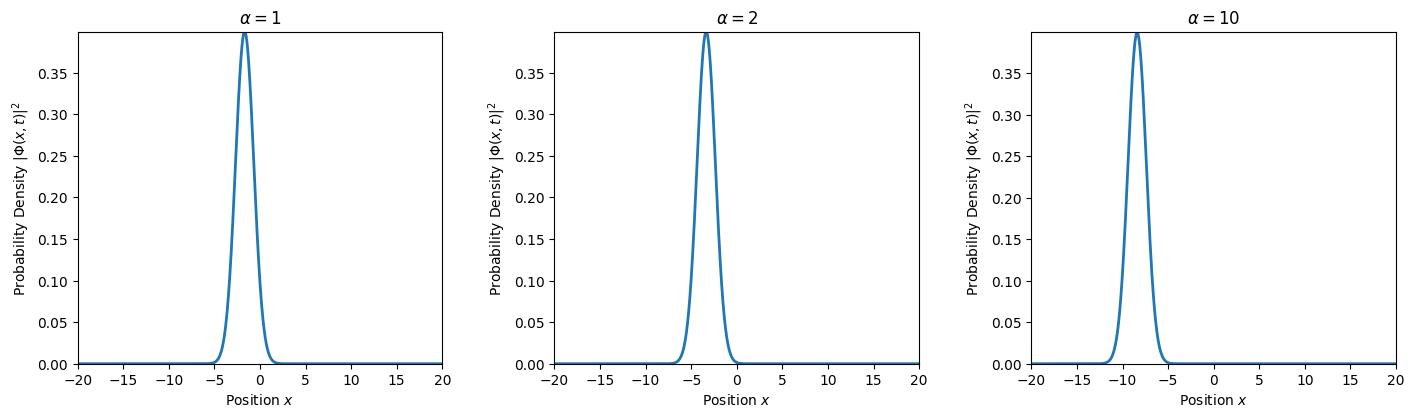

In [17]:
from scipy.special import factorial

x_vals = np.linspace(-20 * x_0, 20 * x_0, 1500)  # Position space range
time_steps = 600  # Number of time steps for the animation
total_time = 20.0  # Total time for the animation
dt = total_time / time_steps  # Time step duration

# Définir les fonctions
def phi_n_coherent(alpha, Nmax):
    norm = np.exp(-(np.abs(alpha)**2) / 2)
    coeffs = [(alpha**n) / np.sqrt(factorial(n)) for n in range(Nmax + 1)]
    coeffs = np.array(coeffs) * norm
    return coeffs

# Pré-calculer psi_n (supposons que psi_n_whole est déjà défini)
psi_n_values = np.array(psi_n_whole(x_vals, Nmax))

# Coefficients de l'état cohérent
alpha_values = [1, 2, 5]
alpha_strs = ["$\\alpha = 1$", "$\\alpha = 2$", "$\\alpha = 10$"]

phi_n_coeffs_arr_coherent = np.array([phi_n_coherent(a, Nmax=Nmax) for a in alpha_values])

# Tableau temporel
exponentials = np.exp(
    -1j * omega * np.outer(np.arange(Nmax + 1), np.linspace(0, total_time, time_steps))
)

# Pré-calculer l'évolution temporelle de l'onde Φ(x, t)
phi_x_t_coherent = np.array(
    [
        (
            psi_n_values[:, :, np.newaxis]
            * exponentials[:, np.newaxis, :]
            * phi_n_coeffs[:, np.newaxis, np.newaxis]
        ).sum(axis=0)
        for phi_n_coeffs in phi_n_coeffs_arr_coherent
    ]
)

# Créer et sauvegarder les animations pour chaque valeur de alpha
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 ligne, 3 colonnes
axes = axes.flatten()

plt.tight_layout(pad=5.0)

# Ajuster les limites et les labels pour chaque subplot
for i, ax in enumerate(axes):
    ax.set_xlim(x_vals[0], x_vals[-1])
    ax.set_ylim(0, np.max(np.abs(phi_x_t_coherent[i]) ** 2))
    ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
    ax.set_xlabel("Position $x$")
    ax.set_title(alpha_strs[i])  # Définir le titre directement à partir de alpha_strs

# Créer les lignes de graphique
line = [axes[i].plot([], [], lw=2)[0] for i in range(3)]

# Fonction d'animation
def animate(i):
    for idx in range(3):
        line[idx].set_data(x_vals, np.abs(phi_x_t_coherent[idx, :, i]) ** 2)
    return line

# Créer l'animation
ani = FuncAnimation(fig, animate, frames=time_steps, interval=50, blit=True)

# Sauvegarder comme MP4
ani.save("wavepacket_evolution_coherent_state.mp4", writer="ffmpeg", fps=30)

plt.show()


# Question 40

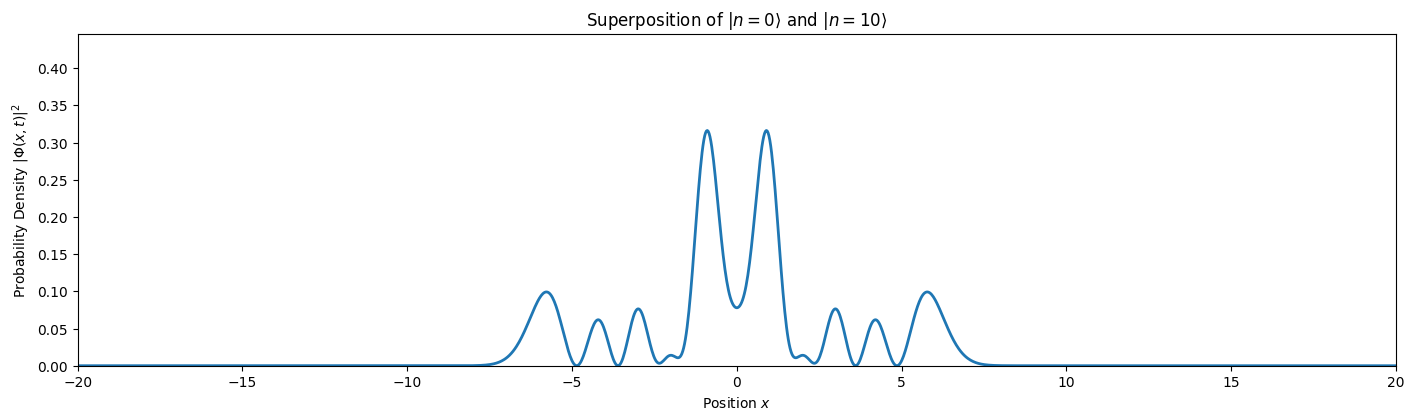

In [14]:


x_vals = np.linspace(-20 * x_0, 20 * x_0, 1500)  # Position space range
time_steps = 600  # Number of time steps for the animation
total_time = 20.0  # Total time for the animation
dt = total_time / time_steps  # Time step duration


# Définir les coefficients de superposition
def phi_n_superposition(Nmax):
    norm = 1 / np.sqrt(2)
    coeffs = np.zeros(Nmax + 1, dtype=complex)  # Initialisation correcte des coefficients
    coeffs[0] = 1
    coeffs[10] = 1  # On prend n = 10 (et non 11)
    coeffs = coeffs * norm  # Normaliser
    return coeffs

# Pré-calculer psi_n (supposons que psi_n_whole est déjà défini)
psi_n_values = np.array(psi_n_whole(x_vals, Nmax))

# Calculer les coefficients de la superposition
phi_n_coeffs_arr_superposition = phi_n_superposition(Nmax=Nmax)

# Calculer le tableau des exponentielles pour l'évolution temporelle
exponentials = np.exp(
    -1j * omega * np.outer(np.arange(Nmax + 1), np.linspace(0, total_time, time_steps))
)

# Pré-calculer l'évolution temporelle de Φ(x, t) en utilisant Eq. (76)
phi_x_t_superposition = (
    (psi_n_values[:, :, np.newaxis] * exponentials[:, np.newaxis, :] * phi_n_coeffs_arr_superposition[:, np.newaxis, np.newaxis])
).sum(axis=0)

# Créer la figure et l'axe pour l'animation
fig, ax = plt.subplots(1, 1, figsize=(15, 5))  # Un seul sous-graphique

plt.tight_layout(pad=5.0)

# Ajuster les limites et les labels pour l'axe
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0, np.max(np.abs(phi_x_t_superposition) ** 2))
ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
ax.set_xlabel("Position $x$")
ax.set_title(r"Superposition of $|n=0\rangle$ and $|n=10\rangle$")

# Créer la ligne de graphique
line, = ax.plot([], [], lw=2)

# Fonction d'animation
def animate(i):
    line.set_data(x_vals, np.abs(phi_x_t_superposition[:, i]) ** 2)
    return line,

# Créer l'animation
ani = FuncAnimation(fig, animate, frames=time_steps, interval=50, blit=True)

# Sauvegarder comme MP4
ani.save("wavepacket_evolution_superposition.mp4", writer="ffmpeg", fps=30)

plt.show()
